In [1]:
import numpy as np
import scipy
import scipy.linalg
import matplotlib.pyplot as mpl

# Eigenstates of a harmonic oscillator

We will determine the eigenfunctions of a harmonic oscillator using *scipy.linalg.eig*.

In [2]:
help(scipy.linalg.eig)

Help on function eig in module scipy.linalg.decomp:

eig(a, b=None, left=False, right=True, overwrite_a=False, overwrite_b=False, check_finite=True)
    Solve an ordinary or generalized eigenvalue problem of a square matrix.
    
    Find eigenvalues w and right or left eigenvectors of a general matrix::
    
        a   vr[:,i] = w[i]        b   vr[:,i]
        a.H vl[:,i] = w[i].conj() b.H vl[:,i]
    
    where ``.H`` is the Hermitian conjugation.
    
    Parameters
    ----------
    a : (M, M) array_like
        A complex or real matrix whose eigenvalues and eigenvectors
        will be computed.
    b : (M, M) array_like, optional
        Right-hand side matrix in a generalized eigenvalue problem.
        Default is None, identity matrix is assumed.
    left : bool, optional
        Whether to calculate and return left eigenvectors.  Default is False.
    right : bool, optional
        Whether to calculate and return right eigenvectors.  Default is True.
    overwrite_a : bool, 

## In-class exercise

First define an x-axis between -3 and 3 with 400 points using *linspace*.

Also, set $k=(2 \pi)^2$ and $m = \hbar = 1$.

Then, define a potential $V(r)$ and Hamiltonian H as:
 
 $$ V(r) = \frac{k}{\alpha} \left| r \right| ^{\alpha} \mathrm{~~~~with~~~~} k, \alpha > 0 $$
 
 $$ \mathrm{H} = \left[ - \frac{\hbar^2}{2m} \frac{d^2}{dx^2} + V(x) \right] $$

In [2]:
# Define the potential Vr(r)
N = 400
xr = np.linspace(-3,3,N)
dx = xr[1]-xr[0]
k = (2*np.pi)**2
m = 1
hbar = 1
alpha = 2

def Vr(r):
    Vr_out = k / alpha * abs(r)**alpha
    return Vr_out

Now we construct a special matrix for the Hamiltonian.

In [3]:
# Construct the H-matrix. Remember, d^2f/dx^2 = f(x+h)-2f(x)+f(x-h).
# Hint: The H-matrix is square; think about its diagonal...

H = np.diag((Vr(xr) + 2*hbar**2/(2*m*dx**2)), k=0)
np.fill_diagonal(H[1:,:], -hbar**2/(2*m*dx**2))
np.fill_diagonal(H[:,1:], -hbar**2/(2*m*dx**2))

In [10]:
# The boundary conditions
H[0,0] = -hbar**2/(2*m*dx**2) * 2 + Vr(xr[0])
H[0,1] = -hbar**2/(2*m*dx**2) * 5
H[0,2] = -hbar**2/(2*m*dx**2) * (-4)
H[0,3] = -hbar**2/(2*m*dx**2)
H[N-1,N-1] = -hbar**2/(2*m*dx**2) * 2 + Vr(xr[N-1])
H[N-1,N-2] = -hbar**2/(2*m*dx**2) * 5
H[N-1,N-3] = -hbar**2/(2*m*dx**2) * (-4)
H[N-1,N-4] = -hbar**2/(2*m*dx**2)

Calculate the eigenvalues using scipy.linalg.eig.

Once the eigenvalues are calculated, graph the 5 lowest eigenvalues' wavefunctions.

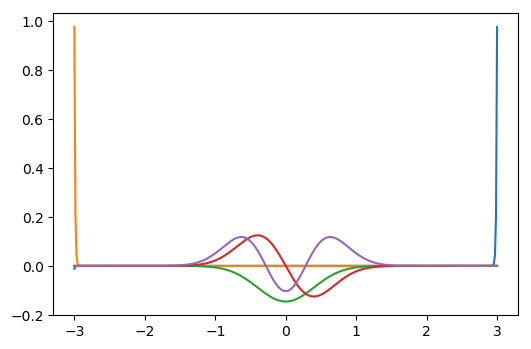

In [11]:
# Eigenvalues and Eigenfunction
E, Vec = scipy.linalg.eig(H)

# Returns the indices that would sort the array E
E_index = E.argsort()
# Number of eigenstates to be plotted
Num_EV = 5



# offset = Vec[:,E_index[:Num_EV]].real.max() - Vec[:,E_index[:Num_EV]].real.min() # How much to offset each value?
# mpl.plot(xr, e2[:,E_index[:Num_EV]].real + np.arange(:Num_EV)*offset) # plot the values.

Graph1 = mpl.figure(dpi=100)
mpl.plot(xr, Vec[:,E_index[0:Num_EV]].real)
mpl.show()

In [12]:
print(E_index[1])
print(E[E_index[1]])

0
(-6224.307823128531+0j)


If you've completed all of the above, start on your homework...